In [3]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

<Figure size 640x480 with 0 Axes>

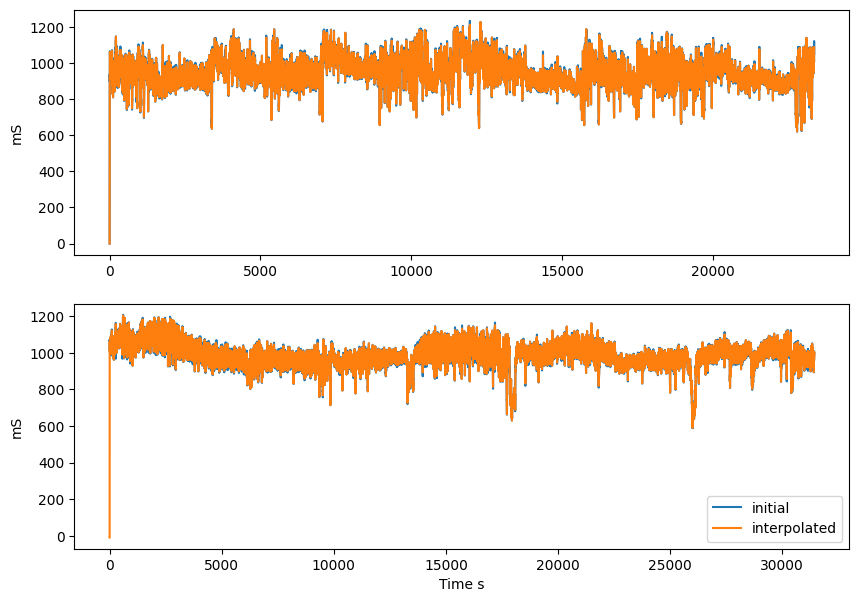

In [4]:
fig = plt.figure()
#Зчитуємо сигнали
math_healthy = scipy.io.loadmat('Downloads\\laba\\heart_rate_norm.mat')
math_sick = scipy.io.loadmat('Downloads\\laba\\heart_rate_apnea.mat')

norm_sig = math_healthy['hr_norm']
sick_sig = math_sick ['hr_ap']
#Час зупинки запису сигналів
t1 = np.sum(norm_sig)/1000
t2 = np.sum(sick_sig)/1000

norm_sig = np.asarray(norm_sig).squeeze()
sick_sig = np.asarray(sick_sig).squeeze()

ax1 = np.cumsum(norm_sig/1000) #to seconds
ax2 = np.cumsum(sick_sig/1000) #to seconds

#Інтерполяція сигналів
from scipy import interpolate
f1 = interpolate.interp1d(ax1,norm_sig)
f2 = interpolate.interp1d(ax2,sick_sig,bounds_error=False, fill_value=-10.)

ax1_new = np.arange(int(t1))
new_norm = f1(ax1_new)
#Збереження сигналі
from scipy.io import savemat
interdict1 = {"healt":new_norm}
savemat("interp_healthy.mat", interdict1)

ax2_new = np.arange(int(t2))
new_sick = f2(ax2_new)
interdict2 = {"sick":new_sick}
savemat("interp_sick.mat", interdict2)

#Побудова графіків
fig, sig =plt.subplots(nrows=2,ncols=1,figsize = (10,7))
health,apnea = sig.flatten() 
health.set_ylabel('mS')
health.plot(ax1,norm_sig, label = 'initial')
health.plot(ax1_new, new_norm, label= 'interpolated')


apnea.set_xlabel('Time s')
apnea.set_ylabel('mS')
apnea.plot(ax2,sick_sig, label = 'initial')
apnea.plot(ax2_new,new_sick, label= 'interpolated')


plt.legend()
plt.show()